## **Email Classifier Spam or Ham**

In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('email_classification_dataset.csv')
df.head()

,id,email,label
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham
3,3244,From: info@customerservice.co\nSubject: Team S...,ham
4,2844,From: info@customerservice.co\nSubject: Team S...,ham


In [12]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [96]:
df.loc[df['label']=='spam','email'][33]

'From: security@alert-system.ru\nSubject: Unclaimed Funds Await You\n\nDear customer, your account has been temporarily suspended due to unusual activity. Please click here to verify your details: [link]'

In [99]:
mail

"From: info@customerservice.co\nSubject: Team Stand-up at 10 AM\n\nHere's your weekly dose of news and updates from our community.\nThis week, we cover [topic 1] and [topic 2]. Read more on our blog: [link to blog]. Sincerely, The Newsletter Team"

In [102]:
pattern_3 = r'\n\n([\s\S]+)'
re.findall(pattern_3,mail)

["Here's your weekly dose of news and updates from our community.\nThis week, we cover [topic 1] and [topic 2]. Read more on our blog: [link to blog]. Sincerely, The Newsletter Team"]

In [ ]:
mail = df[df['label'] =='spam']['email']

In [25]:
mail

'From: social@media-boost.online\nSubject: Your Package Is Delayed - Action Required\n\nInvest in our revolutionary new platform and earn guaranteed high returns. Learn more: [link]'

In [31]:
import re

pattern = r'^From:\s*([\w\.-]+@[\w\.-]+)'
re.findall(pattern, mail)


['social@media-boost.online']

In [29]:
import re

mail = '''From: social@media-boost.online
Subject: Your Package Is Delayed - Action Required

Invest in our revolutionary new platform and earn guaranteed high returns. Learn more: [link]'''

pattern = r'From:\s*([\w\.-]+@[\w\.-]+\.\w+)'
match = re.findall(pattern, mail)

print(match)


['social@media-boost.online']


In [44]:
pattern = r'From:\s*([\w\.-]+@[\w\.-]+\.[a-zA-Z]+)'
mail = '''From: info@customerservice.co\nSubject: Team Stand-up at 10 AM\n\nHere's your weekly dose of news and updates from our community.
This week, we cover [topic 1] and [topic 2]. Read more on our blog: [link to blog]. Sincerely, The Newsletter Team'''

print('the sender :',re.findall(pattern,mail))
pattern_2 = r'\nSubject: \s*(.+)\n'
print('the subject :',re.findall(pattern_2,mail))



the sender : ['info@customerservice.co']
the subject : ['Team Stand-up at 10 AM']


In [52]:
df['sender'] = df['email'].str.extract(pattern)
df['object'] = df['email'].str.extract(pattern_2)

In [49]:
df

,id,email,label,sender,object
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham,support@legitcompany.com,Regarding Your Recent Inquiry
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham,noreply@softwareupdates.com,Weekly Newsletter - Latest Updates
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham,noreply@softwareupdates.com,Important: Software Update Notification
3,3244,From: info@customerservice.co\nSubject: Team S...,ham,info@customerservice.co,Team Stand-up at 10 AM
4,2844,From: info@customerservice.co\nSubject: Team S...,ham,info@customerservice.co,Team Stand-up at 10 AM
...,...,...,...,...,...
9995,6397,From: noreply@softwareupdates.com\nSubject: Ca...,ham,noreply@softwareupdates.com,Catching Up - How are you?
9996,7470,From: family@homemail.net\nSubject: Weekly New...,ham,family@homemail.net,Weekly Newsletter - Latest Updates
9997,9273,From: team@projectmanagement.com\nSubject: Fee...,ham,team@projectmanagement.com,Feedback Request: Your Recent Purchase
9998,3192,From: accounts@billingcorp.com\nSubject: Photo...,ham,accounts@billingcorp.com,Photos from the Weekend Trip


In [60]:
df['sender'].value_counts()

sender
noreply@softwareupdates.com     915
family@homemail.net             881
friend@personalmail.net         875
newsletter@info.org             867
accounts@billingcorp.com        865
team@projectmanagement.com      862
john.doe@example.com            843
survey@retailfeedback.com       812
support@legitcompany.com        800
info@customerservice.co         780
noreply@winner-prize.net        161
info@unclaimed-funds.co         161
social@media-boost.online       157
security@alert-system.ru        155
money@easy-cash.top             154
invest@global-finance.biz       150
deals@best-offers.xyz           147
support@secure-login.com        146
admin@bank-verify.org           135
delivery@package-update.info    134
Name: count, dtype: int64

In [ ]:
df['object'].str.match('').sum()

np.int64(0)

In [73]:
df['num_words'] = df['email'].str.split().str.len()

In [74]:
df

,id,email,label,sender,object,num_words
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham,support@legitcompany.com,Regarding Your Recent Inquiry,37
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham,noreply@softwareupdates.com,Weekly Newsletter - Latest Updates,44
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham,noreply@softwareupdates.com,Important: Software Update Notification,38
3,3244,From: info@customerservice.co\nSubject: Team S...,ham,info@customerservice.co,Team Stand-up at 10 AM,44
4,2844,From: info@customerservice.co\nSubject: Team S...,ham,info@customerservice.co,Team Stand-up at 10 AM,40
...,...,...,...,...,...,...
9995,6397,From: noreply@softwareupdates.com\nSubject: Ca...,ham,noreply@softwareupdates.com,Catching Up - How are you?,45
9996,7470,From: family@homemail.net\nSubject: Weekly New...,ham,family@homemail.net,Weekly Newsletter - Latest Updates,44
9997,9273,From: team@projectmanagement.com\nSubject: Fee...,ham,team@projectmanagement.com,Feedback Request: Your Recent Purchase,32
9998,3192,From: accounts@billingcorp.com\nSubject: Photo...,ham,accounts@billingcorp.com,Photos from the Weekend Trip,39


<Axes: xlabel='num_words', ylabel='Count'>

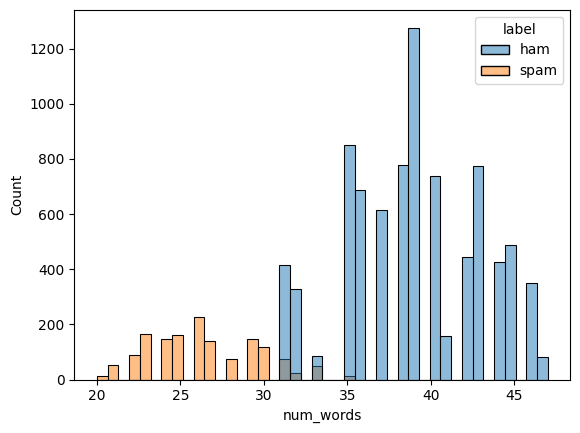

In [77]:
sns.histplot(x=df['num_words'],hue=df['label'])